<a href="https://colab.research.google.com/github/nmcphers128/DS5001_FINALProj_nhm5as/blob/main/finalProj_M08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 8: LDA with SciKit Learn

* DS 5001
* Neil McPherson -- from the orig by Raf Alvarado

In this notebook we create a topic model from our corpus  using SciKit Learn's library.

# Set Up

## Configs

In [ ]:
n_terms = 4000
n_topics = 30
max_iter = 5
OHCO = ['book_id', 'chap_num', 'para_num']

In [ ]:
# prompt: connect google drive

from google.colab import drive
#drive.mount('/content/drive')


## Imports

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
input_dir = "/content/drive/MyDrive/DS5001_finalProj/outputFiles/"

In [ ]:
%matplotlib inline

# Prepare Data

## Convert TOKENS to table of paragraphs

Scikit Learn wants an F1 style corpus. We create onefrom our annotated TOKEN table, keeping only regular nouns.

In [ ]:
TOKENS = pd.read_csv(input_dir+'TOKEN2.csv')
TOKENS.head()

,book_id,chap_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id
0,201,1,1,0,0,"('I', 'PRP')",PRP,I,i,13814
1,201,1,1,0,1,"('call', 'VBP')",VBP,call,call,4124
2,201,1,1,0,2,"('our', 'PRP$')",PRP$,our,our,19395
3,201,1,1,0,3,"('world', 'NN')",NN,world,world,31242
4,201,1,1,0,4,"('Flatland,', 'NNP')",NNP,"Flatland,",flatland,10824


In [ ]:
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})

In [ ]:
BOOKS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'book_str'})

In [ ]:
PARAS.head()

para_str
book_id chap_num para_num                                                   
35      1        0                                              introduction
                 1         him matter pale eyes shone twinkled face fire ...
                 2          you ideas geometry instance school misconception
                 3                                 is thing upon person hair
                 4         i anything ground it you course line line thic...

In [ ]:
BOOKS.head()

,book_str
book_id,
35,introduction him matter pale eyes shone twinkl...
36,one years century world intelligences mans own...
62,man hundred men childhood man man thirty today...
64,bluff cottage night part grey spectre river me...
83,club city energy taste matters nation ship own...


## Create Vector Space

We use Scikit Learn's CountVectorizer to convert our F1 corpus of paragraphs into a document-term vector space of word counts.

In [ ]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names_out()

In [ ]:
tfv2 = CountVectorizer(max_features=n_terms, stop_words='english')
tf2 = tfv.fit_transform(BOOKS.book_str)
TERMS2 = tfv.get_feature_names_out()

# Generate Model

We run Scikit Learn's [LatentDirichletAllocation algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and extract the THETA and PHI tables.

In [ ]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [ ]:
lda2 = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## THETA

In [ ]:
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'

In [ ]:
THETA2 = pd.DataFrame(lda2.fit_transform(tf2), index=BOOKS.index)
THETA2.columns.name = 'topic_id'

In [ ]:
THETA.sample(20).style.background_gradient()

In [ ]:
THETA2.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31516,0.000402,0.000402,0.000402,0.000402,0.000402,0.474795,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.513960,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402
36,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.987121,0.000500,0.000003,0.000003,0.000003,0.000003,0.000003,0.012292,0.000003,0.000003,0.000003
159,0.112219,0.000005,0.000005,0.000005,0.000005,0.197575,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.664824,0.025257,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
41562,0.000037,0.000037,0.048874,0.522152,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.413902,0.000037,0.000037,0.000037,0.000037,0.014105,0.000037,0.000037,0.000037,0.000037,0.000037
10662,0.000001,0.000001,0.000001,0.000001,0.000001,0.015839,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000272,0.000001,0.168552,0.000001,0.000001,0.000001,0.000001,0.815303,0.000001,0.000001,0.000001,0.000001,0.000001
11870,0.000001,0.000001,0.000001,0.000001,0.000001,0.149610,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.845871,0.002137,0.000001,0.000001,0.000001,0.000001,0.000001,0.002349,0.000001,0.000001,0.000001
18857,0.877965,0.000002,0.000002,0.000002,0.000002,0.003332,0.000002,0.000002,0.004900,0.000002,0.000002,0.000002,0.005851,0.000002,0.000002,0.000002,0.000002,0.001155,0.048944,0.000002,0.038963,0.000002,0.003334,0.000002,0.000002,0.000002,0.015509,0.000002,0.000002,0.000002
64,0.000002,0.000002,0.000002,0.000002,0.000002,0.046877,0.000002,0.000002,0.123033,0.000002,0.000002,0.000002,0.001384,0.000002,0.000002,0.000002,0.000002,0.692300,0.031412,0.097218,0.001082,0.000002,0.001664,0.000002,0.004977,0.000002,0.000002,0.000002,0.000002,0.000002
30240,0.000063,0.000063,0.020515,0.000063,0.000063,0.001754,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.964323,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.011773,0.000063,0.000063,0.000063


## PHI

In [ ]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [ ]:
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ability,0.033333,2.211029,0.033333,0.033334,0.033333,0.033333,15.702145,1.040431,1.348644,0.033333,0.033333,0.033333,0.033333,0.033333,2.973202,0.033333,0.033333,0.243250,0.241471,0.560119,0.033333,1.215383,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.797657,0.033333
aboard,1.673309,0.033333,0.033333,0.033333,1.662697,1.392355,1.137600,0.033333,0.033333,0.033333,0.038701,2.033333,1.028968,0.403970,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,2.157265,0.033333,6.711534,0.033333,0.126934,0.033333,0.033333,0.033333,0.033333
abruptly,5.091398,0.033333,0.033333,0.033333,0.033483,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.144973,0.033333,0.033333,0.033333,0.333656,0.033333,0.033333,0.033333,2.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,16.563157,0.033333
absence,0.033333,0.163331,0.033333,0.072377,15.629595,0.169610,0.033333,0.033333,0.033333,0.033333,0.033333,17.998385,0.033333,8.529780,0.033333,14.469359,0.033333,0.033333,0.033333,10.455543,0.150557,0.033333,0.093888,0.231032,3.114237,0.085906,2.562310,0.033333,2.774090,0.033333
absolute,0.033333,0.033333,0.033333,0.033333,0.033333,0.098562,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,3.829990,2.038929,4.135846,0.033333,0.033333,0.033333,0.033333,0.033333,0.129624,3.925407,0.033333,0.033333,0.117132,0.033333,0.033333,0.033333,2.991130,0.033380


In [ ]:
PHI2 = pd.DataFrame(lda2.components_, columns=TERMS)
PHI2.index.name = 'topic_id'
PHI2.columns.name  = 'term_str'

In [ ]:
PHI2.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ability,2.914330,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,13.391237,0.033333,0.033333,0.033333,1.052505,0.033333,0.033333,0.033333,0.033333,1.463244,0.033346,6.326351,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.052320,0.033333,0.033333,0.033333
aboard,0.033869,0.033333,0.033333,0.033333,0.033333,0.035480,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,18.030652,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abruptly,0.033333,0.033333,0.033333,0.033333,0.033333,5.194669,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,2.033333,0.033333,0.033333,0.033333,17.871998,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
absence,6.123410,0.033333,0.033333,0.033333,0.033333,10.325172,0.033333,0.033333,10.075744,0.033333,0.033333,0.033333,4.285462,0.033333,0.033333,0.033333,0.033333,1.125080,4.418356,12.968473,17.569178,0.033333,0.033333,0.033333,0.033333,0.033333,9.409123,0.033333,0.033333,0.033333
absolute,0.033333,0.033333,0.033333,0.033333,0.033333,5.782945,0.033333,0.033333,0.856034,0.033333,0.033333,0.033333,1.061391,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,5.339817,2.035865,0.033333,0.033333,0.033333,0.033333,0.033333,3.123948,0.033333,0.033333,0.033333


# Inspect Results

## Get Top Terms per Topic

In [ ]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x:
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',axis = 1)\
               .term_str)

In [ ]:
TOPICS2 = PHI2.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x:
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',axis = 1)\
               .term_str)

In [ ]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,way,uncle,answer,end,hand,man,room,home,rock,round
1,board,line,chamber,window,guns,minutes,day,sort,certainly,darkness
2,water,captain,island,trees,lake,point,life,rocks,bank,beach
3,engineer,day,time,work,settlers,years,morning,days,island,companions
4,sir,vessel,island,companions,time,hour,sides,months,acid,xodar
5,world,way,night,man,things,bit,spirit,place,kind,time
6,dont,friend,reply,cave,thats,man,place,mouth,eyes,uncle
7,corral,tone,head,convicts,crowd,road,paper,day,cart,silence
8,feet,rock,hands,time,ground,air,wall,head,height,stone


In [ ]:
TOPICS2

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,uncle,earth,time,way,man,water,sea,day,raft,feet
1,ability,probability,pride,priest,priests,prince,princess,principle,principles,print
2,said,wub,gun,room,lines,men,eyes,ship,right,slowly
3,man,door,car,police,bus,street,store,cars,control,town
4,ability,probability,pride,priest,priests,prince,princess,principle,principles,print
5,man,time,way,face,eyes,world,life,hand,men,feet
6,ability,probability,pride,priest,priests,prince,princess,principle,principles,print
7,ability,probability,pride,priest,priests,prince,princess,principle,principles,print
8,warriors,men,feet,city,time,man,building,eyes,ground,life


In [ ]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [ ]:
TOPICS2['label'] = TOPICS2.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [ ]:
TOPICS.label

topic_id
0                  0 way uncle answer end hand man room
1          1 board line chamber window guns minutes day
2          2 water captain island trees lake point life
3       3 engineer day time work settlers years morning
4        4 sir vessel island companions time hour sides
5               5 world way night man things bit spirit
6              6 dont friend reply cave thats man place
7          7 corral tone head convicts crowd road paper
8                8 feet rock hands time ground air wall
9                 9 room air door hand time metal floor
10         10 heart hand thing place time moment verity
11              11 door truth bushes man way night hole
12           12 stars sky warriors time light hill view
13    13 men reporter women hendricks question peopl...
14             14 fear time idea days thing mind people
15     15 come earth bodies man temple therns creatures
16       16 things word night journey matter time hours
17              17 men reason face eyes

In [ ]:
TOPICS2.label

topic_id
0                  0 uncle earth time way man water sea
1     1 ability probability pride priest priests pri...
2                    2 said wub gun room lines men eyes
3                3 man door car police bus street store
4     4 ability probability pride priest priests pri...
5                   5 man time way face eyes world life
6     6 ability probability pride priest priests pri...
7     7 ability probability pride priest priests pri...
8            8 warriors men feet city time man building
9     9 ability probability pride priest priests pri...
10    10 ability probability pride priest priests pr...
11    11 ability probability pride priest priests pr...
12          12 sides eye classes time words sense class
13           13 men brothers eyes earth body things day
14              14 mind pin ship people space set minds
15       15 thing sand water sort tweel creatures beast
16    16 ability probability pride priest priests pr...
17               17 men time eyes man t

## Sort Topics by Doc Weight

In [ ]:
TOPICS['doc_weight_sum'] = THETA.sum()

In [ ]:
TOPICS2['doc_weight_sum'] = THETA2.sum()

<Axes: ylabel='label'>

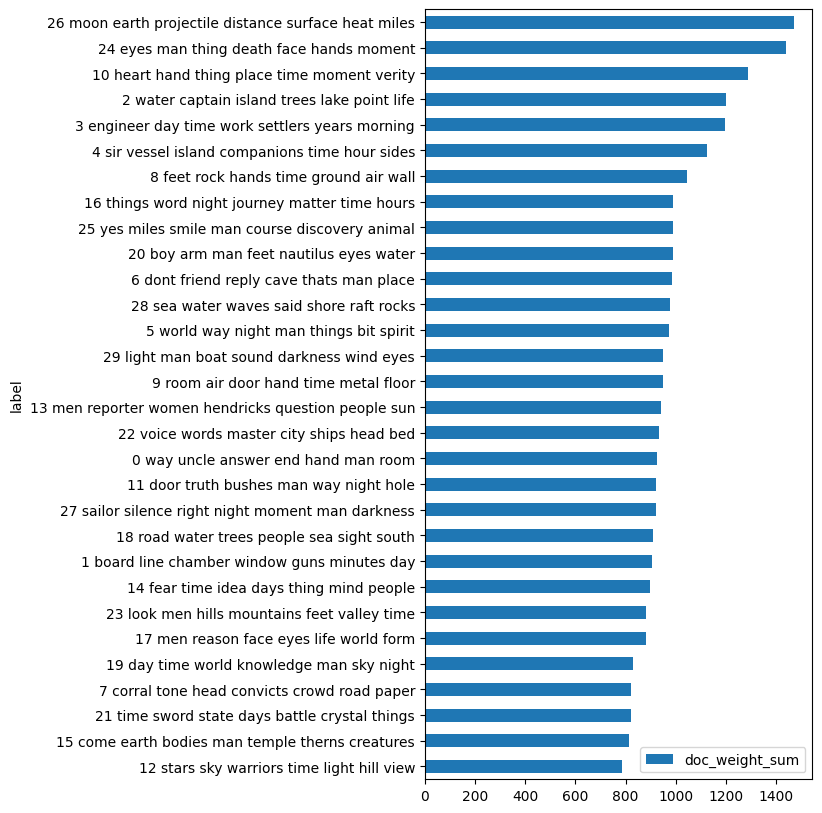

In [ ]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10))

<Axes: ylabel='label'>

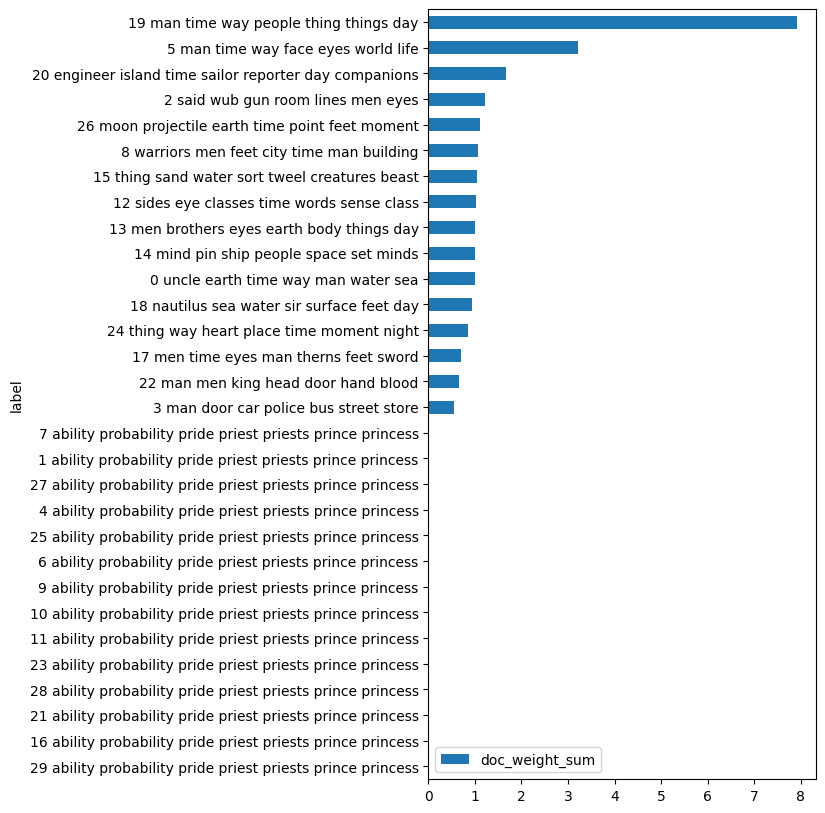

In [ ]:
TOPICS2.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10))

## Explore Topics by Author

In [ ]:
LIB = pd.read_csv(input_dir+'LIB2.csv').set_index('book_id')

In [ ]:
OHCO[:1]  ##  ordering by author and book id when you create AUTHORS2 below

['book_id']

In [ ]:
OHCO  # ##  ordering by author and 'book_id', 'chap_id', 'para_num' when you create AUTHORS below -- topics are finer graned!!

['book_id', 'chap_num', 'para_num']

In [ ]:
topic_cols = [t for t in range(n_topics)]

In [ ]:
AUTHORS = THETA.join(LIB, on='book_id')\
    .reset_index().set_index(['author']+OHCO)\
    .groupby('author')[topic_cols].mean()\
    .T
AUTHORS.index.name = 'topic_id'

In [ ]:
AUTHORS2 = THETA2.join(LIB, on='book_id')\
    .reset_index().set_index(['author']+OHCO[:1])\
    .groupby('author')[topic_cols].mean()\
    .T
AUTHORS2.index.name = 'topic_id'

In [ ]:
AUTHORS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [ ]:
AUTHORS2['topterms'] = TOPICS2[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [ ]:
AUTHORS.sort_values('VERNE', ascending=False).style.background_gradient()

author,ABBOTT,BURROUGHS,DICK,DOYLE,HODGSON,HOWARD,KORNBLUTH,LINDSAY,LINEBARGER,RAND,VERNE,VONNEGUT,WEINBAUM,WELLS,topterms
topic_id,,,,,,,,,,,,,,,
26,0.044306,0.018565,0.021028,0.022768,0.010840,0.009800,0.022199,0.025125,0.018539,0.016492,0.096416,0.017316,0.035054,0.019617,moon earth projectile distance surface heat miles point sun atmosphere
3,0.012858,0.017641,0.019428,0.036910,0.012001,0.010856,0.036827,0.028228,0.020523,0.031253,0.066606,0.035512,0.043441,0.029198,engineer day time work settlers years morning days island companions
4,0.056946,0.037036,0.028115,0.031937,0.007377,0.031607,0.019962,0.020971,0.026699,0.012716,0.060023,0.023697,0.017195,0.017870,sir vessel island companions time hour sides months acid xodar
2,0.026250,0.018642,0.028519,0.048409,0.014082,0.026014,0.024863,0.039340,0.015064,0.026710,0.059052,0.024125,0.048037,0.030233,water captain island trees lake point life rocks bank beach
28,0.012775,0.017725,0.045948,0.021330,0.019127,0.016629,0.053741,0.030592,0.017589,0.019427,0.044016,0.025611,0.034377,0.028939,sea water waves said shore raft rocks oh coast light
20,0.033411,0.027928,0.039904,0.033229,0.009895,0.023738,0.037871,0.039379,0.021253,0.017515,0.038241,0.037060,0.029078,0.033831,boy arm man feet nautilus eyes water face hair turn
25,0.044423,0.033062,0.037494,0.048151,0.008692,0.028308,0.044217,0.037277,0.028398,0.025944,0.036844,0.030644,0.040728,0.028723,yes miles smile man course discovery animal lips friends names
1,0.036213,0.034097,0.030915,0.024907,0.006479,0.027581,0.042528,0.030456,0.026039,0.015203,0.034844,0.031587,0.044128,0.030117,board line chamber window guns minutes day sort certainly darkness
8,0.030865,0.055140,0.028151,0.034651,0.044121,0.027993,0.024277,0.040335,0.020189,0.036547,0.033097,0.032421,0.026048,0.026378,feet rock hands time ground air wall head height stone


In [ ]:
AUTHORS2.sort_values('VERNE', ascending=False).style.background_gradient()

author,ABBOTT,BURROUGHS,DICK,DOYLE,HODGSON,HOWARD,KORNBLUTH,LINDSAY,LINEBARGER,RAND,VERNE,VONNEGUT,WEINBAUM,WELLS,topterms
topic_id,,,,,,,,,,,,,,,
20,0.000008,0.000543,0.112380,0.000003,0.000001,0.013791,0.024259,0.000002,0.000047,0.000012,0.285149,0.000078,0.000022,0.006975,engineer island time sailor reporter day companions sea water colonists
26,0.000008,0.000383,0.000132,0.000003,0.000001,0.000003,0.065734,0.000002,0.000047,0.000012,0.253863,0.005933,0.000022,0.004520,moon projectile earth time point feet moment distance travelers space
18,0.000008,0.015708,0.000132,0.000003,0.000001,0.003039,0.000020,0.000002,0.000047,0.000012,0.226369,0.000078,0.000022,0.000004,nautilus sea water sir surface feet day time air yards
0,0.000008,0.000003,0.000132,0.000003,0.000001,0.000003,0.000020,0.000002,0.000047,0.000012,0.219492,0.000078,0.000022,0.028057,uncle earth time way man water sea day raft feet
19,0.000008,0.091531,0.312530,0.009404,0.168552,0.210142,0.787439,0.000002,0.000047,0.000012,0.007980,0.933391,0.000022,0.855306,man time way people thing things day night face eyes
5,0.000008,0.023440,0.142980,0.990518,0.015839,0.075800,0.000020,0.999935,0.000047,0.000012,0.002299,0.048344,0.000022,0.102866,man time way face eyes world life hand men feet
12,0.999762,0.000694,0.000132,0.000003,0.000001,0.000003,0.000020,0.000002,0.000047,0.000012,0.001464,0.000078,0.000022,0.002181,sides eye classes time words sense class way point number
22,0.000008,0.003203,0.000132,0.000003,0.000001,0.651081,0.002605,0.000002,0.000047,0.000012,0.001381,0.000078,0.000022,0.000004,man men king head door hand blood sword eyes xaltotun
8,0.000008,0.511376,0.000691,0.000003,0.000001,0.014330,0.023680,0.000002,0.000047,0.000012,0.001226,0.000078,0.000022,0.000004,warriors men feet city time man building eyes ground life


In [ ]:
AUTHORS.sort_values('WELLS', ascending=False).style.background_gradient()

author,ABBOTT,BURROUGHS,DICK,DOYLE,HODGSON,HOWARD,KORNBLUTH,LINDSAY,LINEBARGER,RAND,VERNE,VONNEGUT,WEINBAUM,WELLS,topterms
topic_id,,,,,,,,,,,,,,,
24,0.053495,0.073681,0.037021,0.039958,0.097547,0.062774,0.045077,0.059415,0.072668,0.085311,0.023533,0.048635,0.033427,0.061213,eyes man thing death face hands moment body life pain
5,0.057381,0.026727,0.039017,0.038136,0.062933,0.026235,0.025436,0.044091,0.031054,0.031393,0.019606,0.033997,0.027114,0.045015,world way night man things bit spirit place kind time
0,0.030000,0.017413,0.027224,0.042426,0.023470,0.039003,0.032517,0.030843,0.015913,0.023490,0.029543,0.036190,0.030950,0.043959,way uncle answer end hand man room home rock round
19,0.036063,0.023885,0.020100,0.038824,0.051913,0.029966,0.029168,0.030546,0.034828,0.041468,0.016619,0.022145,0.025628,0.041882,day time world knowledge man sky night land life river
11,0.026336,0.027297,0.040095,0.034363,0.062769,0.040982,0.029628,0.037870,0.044484,0.031058,0.018013,0.040457,0.029426,0.039076,door truth bushes man way night hole woman place face
9,0.030546,0.042961,0.062469,0.024119,0.013656,0.038489,0.041938,0.026470,0.038158,0.029874,0.028087,0.049677,0.026646,0.038440,room air door hand time metal floor minute doorway day
18,0.027284,0.045772,0.022748,0.037530,0.007902,0.022412,0.020314,0.022446,0.018084,0.026797,0.032440,0.016541,0.029860,0.038421,road water trees people sea sight south north creature shore
6,0.030445,0.027089,0.038163,0.047309,0.015129,0.025364,0.053784,0.044988,0.040121,0.015466,0.031542,0.055986,0.053659,0.037440,dont friend reply cave thats man place mouth eyes uncle
17,0.033784,0.038357,0.039125,0.035650,0.023296,0.035513,0.038730,0.044464,0.023991,0.042458,0.018873,0.040194,0.034272,0.036527,men reason face eyes life world form head surprise lives


In [ ]:
AUTHORS2.sort_values('WELLS', ascending=False).style.background_gradient()

author,ABBOTT,BURROUGHS,DICK,DOYLE,HODGSON,HOWARD,KORNBLUTH,LINDSAY,LINEBARGER,RAND,VERNE,VONNEGUT,WEINBAUM,WELLS,topterms
topic_id,,,,,,,,,,,,,,,
19,0.000008,0.091531,0.312530,0.009404,0.168552,0.210142,0.787439,0.000002,0.000047,0.000012,0.007980,0.933391,0.000022,0.855306,man time way people thing things day night face eyes
5,0.000008,0.023440,0.142980,0.990518,0.015839,0.075800,0.000020,0.999935,0.000047,0.000012,0.002299,0.048344,0.000022,0.102866,man time way face eyes world life hand men feet
0,0.000008,0.000003,0.000132,0.000003,0.000001,0.000003,0.000020,0.000002,0.000047,0.000012,0.219492,0.000078,0.000022,0.028057,uncle earth time way man water sea day raft feet
20,0.000008,0.000543,0.112380,0.000003,0.000001,0.013791,0.024259,0.000002,0.000047,0.000012,0.285149,0.000078,0.000022,0.006975,engineer island time sailor reporter day companions sea water colonists
26,0.000008,0.000383,0.000132,0.000003,0.000001,0.000003,0.065734,0.000002,0.000047,0.000012,0.253863,0.005933,0.000022,0.004520,moon projectile earth time point feet moment distance travelers space
12,0.999762,0.000694,0.000132,0.000003,0.000001,0.000003,0.000020,0.000002,0.000047,0.000012,0.001464,0.000078,0.000022,0.002181,sides eye classes time words sense class way point number
18,0.000008,0.015708,0.000132,0.000003,0.000001,0.003039,0.000020,0.000002,0.000047,0.000012,0.226369,0.000078,0.000022,0.000004,nautilus sea water sir surface feet day time air yards
24,0.000008,0.006915,0.003649,0.000003,0.815303,0.015035,0.000020,0.000002,0.000047,0.000012,0.000453,0.000078,0.000022,0.000004,thing way heart place time moment night spirit hours truly
8,0.000008,0.511376,0.000691,0.000003,0.000001,0.014330,0.023680,0.000002,0.000047,0.000012,0.001226,0.000078,0.000022,0.000004,warriors men feet city time man building eyes ground life


In [ ]:
#!pip install plotly_express

import plotly_express as px

In [ ]:
px.scatter(AUTHORS.reset_index(), 'VERNE', 'WELLS', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

# CLUSTER TOPICS

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [ ]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [ ]:
labels  = ["{}: {}".format(a,b) for a, b in zip(AUTHORS.index,  AUTHORS.topterms.tolist())]

<Figure size 640x480 with 0 Axes>

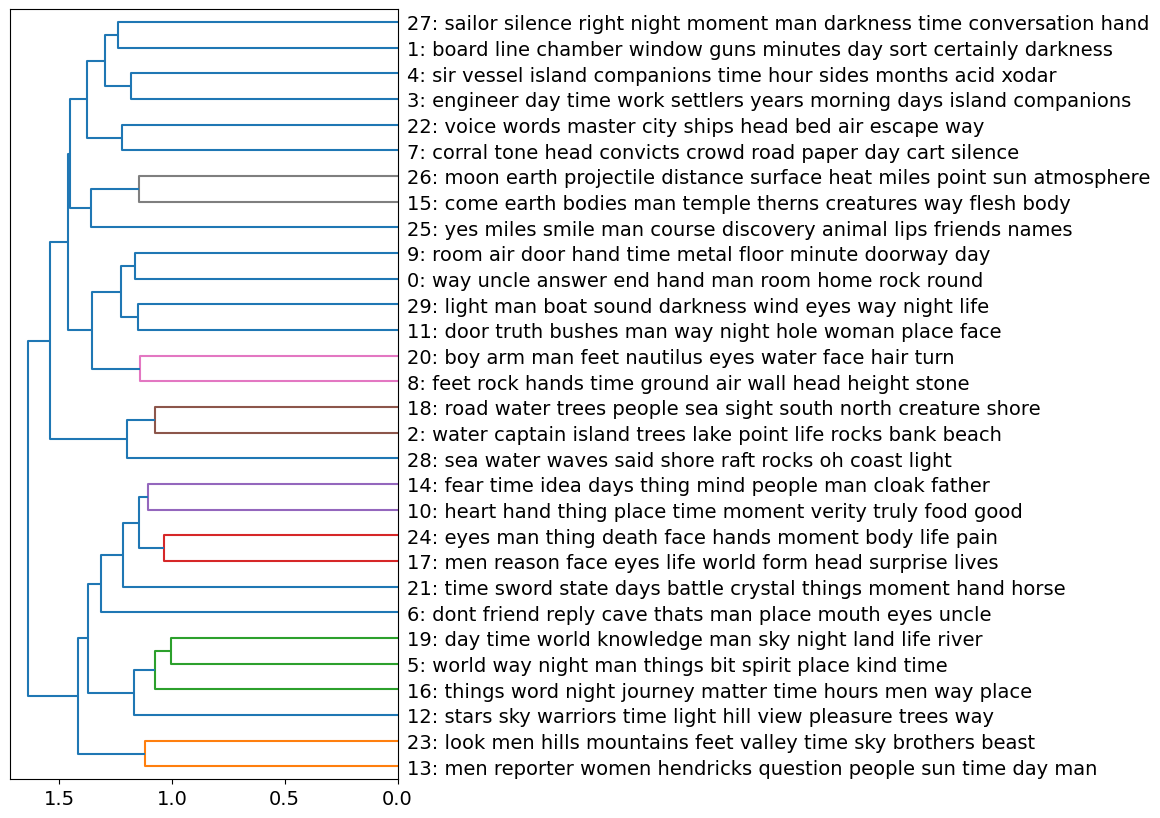

In [ ]:
plot_tree(TREE, labels)